In [6]:

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

['images', 'data', 'target_names', 'DESCR', 'target']

In [16]:
x = digits.data
y = digits.target
print(x.shape)
print(y.shape)

(1797, 64)
(1797,)


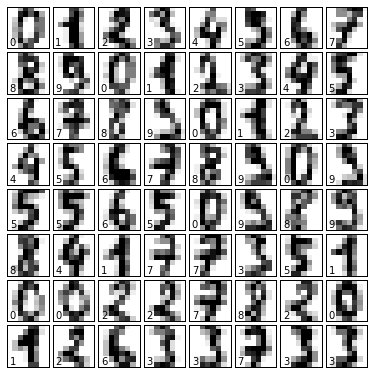

In [17]:
# set up the figure
fig = plt.figure(figsize=(5, 5))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.1, wspace=0.1)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    digit_plot = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    digit_plot.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    digit_plot.text(0, 7, str(digits.target[i]))

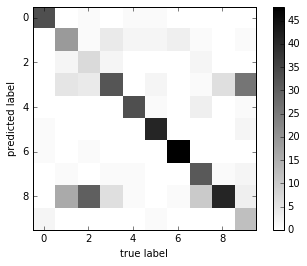

In [19]:
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier


x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(x_train, y_train)
ypred = clf.predict(x_test)

plt.imshow(metrics.confusion_matrix(ypred, y_test),
           interpolation='nearest', cmap=plt.cm.binary)
plt.colorbar()
plt.xlabel("true label")
plt.ylabel("predicted label");

SVC: kernel = rbf
0.541483398619


//anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:756: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)


SVC: kernel = linear
0.97112374636


//anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:756: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)


RF: max_depth = 3
0.731840925522


//anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:756: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)


RF: max_depth = 5
0.874481272465


//anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:756: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)


RF: max_depth = 10
0.948874772633


//anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:756: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)


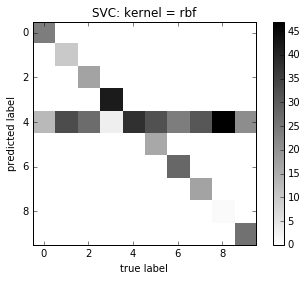

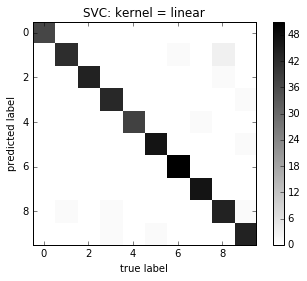

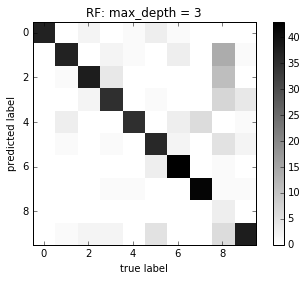

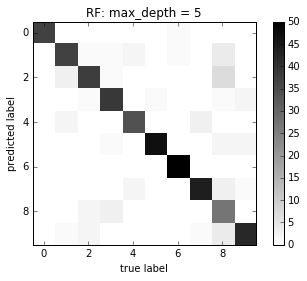

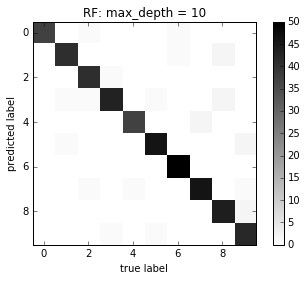

In [20]:
from sklearn.svm import SVC
from sklearn import metrics

for kernel in ['rbf', 'linear']:
    clf = SVC(kernel=kernel).fit(x_train, y_train)
    ypred = clf.predict(x_test)
    print("SVC: kernel = {0}".format(kernel))
    print(metrics.f1_score(y_test, ypred))
    plt.figure()
    plt.imshow(metrics.confusion_matrix(ypred, y_test),
               interpolation='nearest', cmap=plt.cm.binary)
    plt.colorbar()
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    plt.title("SVC: kernel = {0}".format(kernel))
    
# random forest results
from sklearn.ensemble import RandomForestClassifier

for max_depth in [3, 5, 10]:
    clf = RandomForestClassifier(max_depth=max_depth).fit(x_train, y_train)
    ypred = clf.predict(x_test)
    print("RF: max_depth = {0}".format(max_depth))
    print(metrics.f1_score(y_test, ypred))
    plt.figure()
    plt.imshow(metrics.confusion_matrix(ypred, y_test),
               interpolation='nearest', cmap=plt.cm.binary)
    plt.colorbar()
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    plt.title("RF: max_depth = {0}".format(max_depth))

In [6]:
def anagrams(s1, s2):
    
    s1 = s1.replace(' ', '').lower()
    s2 = s2.replace(' ', '').lower()
    
    if len(s1) != len(s2):
        return False
    
    count = {}
    
    for letter in s1:
        if letter in count:
            count[letter] += 1
        else:
            count[letter] = 1
            
    for letter in s2:
        if letter in count:
            count[letter] -= 1
        else:
            count[letter] = 1
    
    for x in count:
        if count[x] != 0:
            return False
        
    return True
    

In [7]:
anagrams("dog ", 'god')

True

In [9]:
anagrams('I am here sir t', 'is there ram I')

True

In [11]:
def anag(s1, s2):
    
    s1 = s1.replace(' ', '').lower()
    s2 = s2.replace(' ', '').lower()
    
    if len(s1) != len(s2):
        return False
    
    if sorted(s1) == sorted(s2):
        return True

In [12]:
anag('I am here sir t', 'is there ram I')

True

In [23]:
def pair_add(arr, K):
    
    if len(arr) < 2:
        print "number of arrays is insufficient"
    
    seen = set()
    output = set()
    
    for num in arr:
        
        target = K - num
        
        if target not in seen:
            seen.add(num)
            
        else:
            output.add( (min(target, num), max(target, num)))
            print (min(target, num), max(target, num))
            
    return len(output)

 

In [24]:
pair_add([1,2,4,3,5,0], 5)

(1, 4)
(2, 3)
(0, 5)


3

In [34]:
def finder(arr1, arr2):
    
    if len(arr1) - len(arr2) > 1:
        return
    
    arr1.sort()
    arr2.sort()
    
    for num1, num2 in zip(arr1, arr2):
        
        if num1 != num2:
            return num1
        
        else:
            return arr1[-1]

In [35]:
finder([3,3,4,5,5],[3,3,4,5])

5

In [49]:
def sum(arr):
    
    if len(arr) == 0:
        return 0
    
    current_sum = arr[0]
    max_sum = arr[0]
    
    for num in arr[1:]:
        
        current_sum = max((current_sum + num), num)
                
        max_sum = max(current_sum, max_sum)
        
       
    return max_sum
    
   
        
    

In [50]:
sum([1,2,-1,3,4,10,10,-10,-1])

29

In [62]:
def rev(sen1):
    
    sen1 = sen1.split(' ')
    
    return sen1[::-1]
    
    

In [64]:
rev("I am here    ")

['', '', '', '', 'here', 'am', 'I']

In [84]:
def comp(elem):
    
    if len(elem) == 0:
        return None
    
    if len(elem) == 1:
        return elem
    
    r = ""
    i = 1
    count = 1
    
    while i < len(elem):
        
        if elem[i] == elem[i-1]:
            count += 1
            
        else:
            r = r + elem[i-1] + str(count)
            
        i += 1
        
    r =  r + elem[i-1] + str(count)
    
    return r

            

In [85]:
comp('aabbbccDDdd')

'a2b4c5D6d7'

In [88]:
def unique(seq):
    
    if len(seq) == 0:
        return
    
    seq = sorted(seq)
    i = 1
    count = 1
    
    while i < len(seq):
        
        if seq[i] == seq[i-1]:
            return False
        i += 1
        
    return True
    
    

In [90]:
unique('abacdbc')

False

In [91]:
unique('abdcfgk')

True

In [107]:
class Stack(object):
    
    def __init__(self):
        self.items = []
        
    def isempty(self):
        return self.items == []
    
    def push(self, item):
        return self.items.append(item)
    
    def pop(self):
        return self.items.pop()
    
    def peek(self):
        return self.items[(len(self.items)-1)]
    
    def size(self):
        return len(self.items)

In [108]:
x = Stack()

In [109]:
x.isempty()

True

In [110]:
x.push(4)

In [111]:
x.isempty()

False

In [113]:
x.size()

1

In [114]:
x.push('er')

In [115]:
x.push('room')

In [116]:
x.peek()

'room'

In [117]:
x.isempty()

False

In [120]:
x.pop()

'er'

In [121]:
x.size()

1

In [122]:
x.pop()

4

In [123]:
x.size()

0

In [124]:
x.isempty()

True

In [125]:
class Queue(object):
    
    def __init__(self):
        self.items = []
        
    def isempty(self):
        return self.items == []
    
    def enque(self, item):
        return self.items.insert(0, item)
    
    def deque(self):
        return self.items.pop()
    
    def size(self):
        return len(self.items)

In [126]:
y = Queue()

In [127]:
y.isempty()

True

In [128]:
y.enque(4)

In [129]:
y.isempty()

False

In [130]:
y.enque(6)

In [131]:
y.enque(8)

In [132]:
y.size()

3

In [133]:
y.items

[8, 6, 4]

In [134]:
y.deque()

4

In [135]:
y.items

[8, 6]

In [136]:
class Deque(object):
    
    def __init__(self):
        self.items = []
        
    def isempty(self):
        return self.items == []
    
    def addfront(self, item):
        return self.items.append(item)
    
    def addrear(self, item):
        return self.items.insert(0, item)
    
    def removefront(self):
        return self.items.pop()
    
    def removerear(self):
        return self.items.pop(0)
    
    def size(self):
        return len(self.items)

In [137]:
a = Deque()

In [138]:
a.isempty()

True

In [139]:
a.items

[]

In [140]:
a.addfront(9)

In [141]:
a.addrear(8)

In [143]:
a.items

[8, 9]

In [144]:
a.addrear(6)

In [145]:
a.items

[6, 8, 9]

In [146]:
a.addfront(12)

In [147]:
a.items

[6, 8, 9, 12]

In [148]:
a.removerear()

6

In [149]:
a.items

[8, 9, 12]

In [150]:
a.removefront()

12

In [151]:
a.items

[8, 9]

In [152]:
a.size()

2

In [158]:
def check(s):
    
    opening = set('([{')
    matches = set([ ('(',')'), ('[',']'), ('{','}')])
    
    stack = []
    
    for i in s:
        
        if i in opening:
            stack.append(i)
            
        else:
            if len(stack)== 0:
                return False
            
            last = stack.pop()
            
            if (last, i) not in matches:
                return False
            
    return len(stack) == 0
            

In [160]:
check('(){}{}{')

False